In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import pylab as plt

### Question 1

In [2]:
ntry = 10000

ntot = 0
n_bw = 0
for _ in range(ntry):
    
    the_door = np.random.randint(3)
    bob_1 = np.random.randint(3)
    
    ntot += 1
    if the_door==bob_1:
        n_bw += 1
        
print(n_bw/ntot)

0.3297


In [3]:
ntry = 10000

ntot = 0
n_aw = 0
for _ in range(ntry):
    
    the_door = np.random.randint(3)
    alice_1 = np.random.randint(3)
    
    choices = [0,1,2]
    ch_new = [0,1,2]
    ch_0 = [0,1,2]
    ch_new.remove(alice_1)
    ch_0.remove(alice_1)
    if the_door in ch_0:
        ch_0.remove(the_door)
    igdoor = np.random.choice(ch_0)
    ch_new.remove(igdoor)
    alice_2 = ch_new[0]
    ntot += 1
    if the_door==alice_2:
        n_aw += 1
        
print(n_aw/ntot)

0.6745


### Question 2

In [4]:
data = pd.read_csv('./datasets/UN_cleaned.csv')

In [5]:
data.head()

,Unnamed: 0,country,Year,internetusage,CPIG,CPIF,Imports,Exports,homicide,migrants,GDP,PPP,tourexp,tvarrival,education,Manufacturing
0,0,Armenia,2010,25.0,100.0,100.0,3782,1011,1.9,7.7,9875,3432,694,684,12.4005,101.7
1,1,Australia,2010,76.0,100.0,100.0,201703,212109,1.0,26.6,1297259,58646,31064,5790,14.3276,100.5
2,2,Austria,2010,75.2,100.0,100.0,150593,144882,0.7,15.2,391893,46599,18758,22004,10.7891,108.1
3,3,Azerbaijan,2010,46.0,100.0,100.0,6597,21278,2.3,3.1,52906,5857,792,1280,8.7008,123.5
4,4,Belarus,2010,31.8,100.0,100.0,34884,25283,4.2,11.5,57232,6042,665,119,11.7781,150.6


In [6]:
data.columns

Index(['Unnamed: 0', 'country', 'Year', 'internetusage', 'CPIG', 'CPIF',
       'Imports', 'Exports', 'homicide', 'migrants', 'GDP', 'PPP', 'tourexp',
       'tvarrival', 'education', 'Manufacturing'],
      dtype='object')

In [7]:
data = data.drop(columns=['Unnamed: 0','country','Year'])

In [8]:
cols = data.columns

In [9]:
c1 = 'internetusage'
c2 = 'CPIG'

np.corrcoef(x=data[c1].values, y=data[c2].values)[0,1]

-0.017049126806947312

In [15]:
nn = len(cols)
cov = np.zeros((nn,nn))

for i in range(nn):
    for j in range(i,nn):
        cc = np.corrcoef(x=data[cols[i]].values, y=data[cols[j]].values)[0,1]
        cov[i,j] = cc
        cov[j,i] = cc

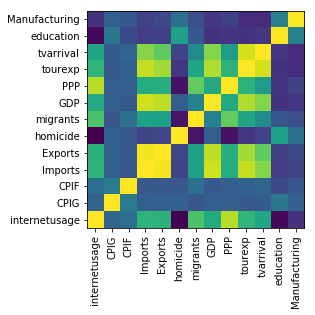

In [16]:
plt.imshow(cov,origin='bottom')
plt.xticks(np.arange(len(cols)),cols,rotation=90);
plt.yticks(np.arange(len(cols)),cols);

Just for check

In [11]:
from ccgpack import cov_mat

/home/gf/packages/anaconda3/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


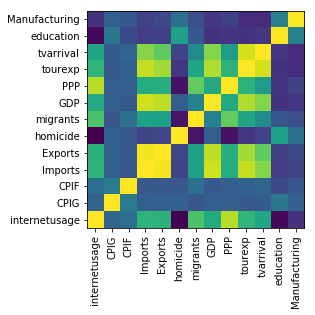

In [18]:
ddd = data.values
ccc = cov_mat(ddd)

plt.imshow(ccc,origin='bottom')
plt.xticks(np.arange(len(cols)),cols,rotation=90);
plt.yticks(np.arange(len(cols)),cols);

In [20]:
np.sum((ccc-cov)**2)

1.3208852097365104e-29

### Question 3

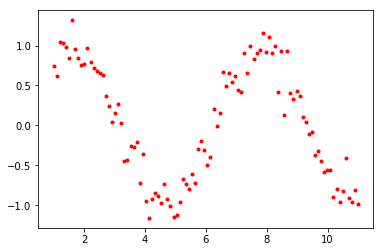

In [91]:
data = np.load('./datasets/exercise.npy')
x = data[:,0]
y = data[:,1]

plt.plot(x,y,'r.')

In [135]:
def compute_cost(x, y, a, b):
    return np.mean((y - a*np.sin(b*x)) ** 2)

def update(a, b, x, y , learning_rate):
    diff = 0.01
    a_gradient = compute_cost(x, y, a+diff, b)-compute_cost(x, y, a, b)
    b_gradient = compute_cost(x, y, a, b+diff)-compute_cost(x, y, a, b)
    a_gradient /= diff
    b_gradient /= diff
    a_updated = a - learning_rate * a_gradient
    b_updated = b - learning_rate * b_gradient
    return a_updated, b_updated

def gd_runner(x, y, a0, b0, learning_rate, num_iterations):
    a = a0
    b = b0
    for i in range(num_iterations):
        cost = compute_cost(x, y, a, b)
        a, b = update(a, b, x, y, learning_rate)
#         if i%100==0:
#             print(a, b, cost)
    return a, b, cost


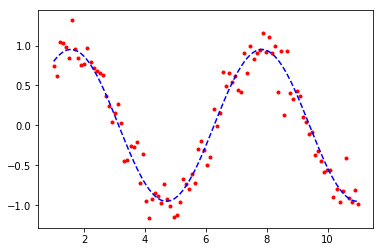

In [136]:
#hyperparamters
learning_rate = 0.01
a0 = 2
b0 = 1
num_iterations = 2000

a, b, cost = gd_runner(x, y, a0, b0, learning_rate, num_iterations)

plt.plot(x,y,'r.')
plt.plot(x,a*np.sin(b*x),'b--')

Or ou can use scipy least square optimizers:

In [74]:
from scipy.optimize import least_squares,leastsq

In [117]:
def model(x,coefs):
    return coefs[0]*np.sin(coefs[1]*x)

def loss(coefs, x, y):
    return (y - model(x, coefs))**2

x0 = np.array([2,1], dtype=float)

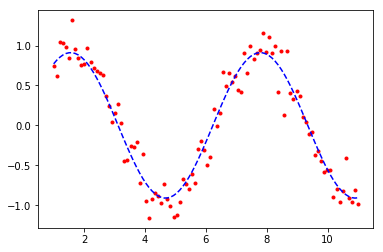

In [118]:
res_lsq = least_squares(loss, x0, args=(x, y))
coefs = res_lsq.x

plt.plot(x,y,'r.')
plt.plot(x,model(x,coefs),'b--')

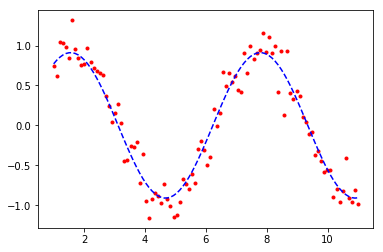

In [119]:
coefs, flag = leastsq(loss, x0, args=(x,y))

plt.plot(x,y,'r.')
plt.plot(x,model(x,coefs),'b--')